# Closed loop controlled responses

I discuss drawing these response qualitatively in [this video](https://youtu.be/8iO_lNuSZYc). Note that the responses that are drawn in the video match the responses drawn here, but the value of $\tau_I$ specified there doesn't show overshoot as in this notebook. The value in the video is $\tau_I=10$, but that was obviously a bit too large to allow for the extreme oscillation. You can get a similar response to the one I sketched by using $\tau_I=1$. The value below has been chosen to make the discussion in the video still hold in the same way.

In [1]:
from tbcontrol.loops import feedback
import control
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

In [2]:
s = control.tf([1, 0], 1)

In [8]:
Gp = 1/(10*s + 1)
PI = 5*(1 + 1/(10*s))
P = 5

In [9]:
ts = numpy.linspace(0, 30)

Find the time where the error becomes zero by interpolating on the output response

In [10]:
t, y = control.step_response(feedback(PI*Gp, 1))
errorzero = numpy.interp(1, y, t)

This function will plot a response for us

In [11]:
def plotresponse(ax, G, *args, **kwargs):
    ax.plot(*control.step_response(G, T=ts), *args, **kwargs)
    ax.axvline(errorzero, color='teal', linestyle='--')

I'm trying to get all the colors to match the video here.

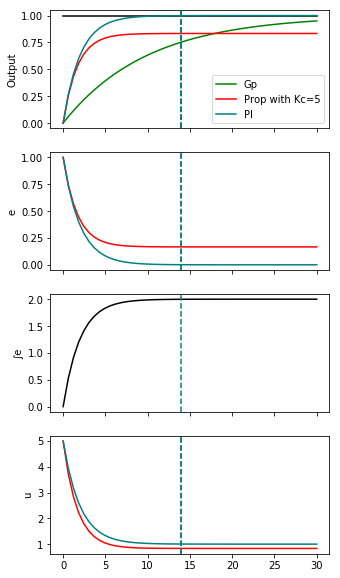

In [12]:
fig, (outputs, errors, errorint, u) = plt.subplots(4, 1, figsize=(5, 10), sharex=True)
outputs.plot(ts, numpy.ones_like(ts), color='black')
plotresponse(outputs, Gp, color='green', label='Gp')
plotresponse(outputs, feedback(P*Gp, 1), color='red', label='Prop with Kc=5')
plotresponse(outputs, feedback(PI*Gp, 1), color='teal', label='PI')
outputs.set_ylabel('Output')
outputs.legend()

plotresponse(errors, 1 - feedback(P*Gp, 1), color='red')
plotresponse(errors, 1 - feedback(PI*Gp, 1), color='teal')
errors.set_ylabel('e')

plotresponse(u, feedback(P, Gp), color='red')
plotresponse(u, feedback(PI, Gp), color='teal')
u.set_ylabel('u')

plotresponse(errorint, (1 - feedback(PI*Gp, 1))/s, color='black')
errorint.set_ylabel('∫e');